In [13]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
data=pd.read_csv('/content/drive/My Drive/ML DataSet/dataset-har-PUC-Rio-ugulino.csv',sep=';')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
print(data.head(5))
# Here the dataset for BMI contains delimiter ',' we need to replace to '.'
new_data = data['body_mass_index'].str.split(',', expand=True)  #split the dataframe using ',' delimiter
new_data[0]=new_data[0].astype(float)  #convert the datatype to float
new_data[1]=new_data[1].astype(float)  
data['body_mass_index']=new_data[0]+new_data[1]*0.1  #add the columns to get the BMI
# The dataset for Height contains ',' instead of '.' so we need to preprocess it as well 
new_data = data['how_tall_in_meters'].str.split(',', expand=True) #taken the data 
new_data[0]=new_data[0].astype(float) #converted it to type float
new_data[1]=new_data[1].astype(float) 
data['how_tall_in_meters']=new_data[0]+new_data[1]*0.01 #final conversion

     user gender  age how_tall_in_meters  weight  ...  z3   x4   y4    z4    class
0  debora  Woman   46               1,62      75  ... -92 -150 -103  -147  sitting
1  debora  Woman   46               1,62      75  ... -90 -149 -104  -145  sitting
2  debora  Woman   46               1,62      75  ... -90 -151 -104  -144  sitting
3  debora  Woman   46               1,62      75  ... -89 -153 -103  -142  sitting
4  debora  Woman   46               1,62      75  ... -89 -153 -104  -143  sitting

[5 rows x 19 columns]


In [16]:
woman=data[data['gender']=='Woman']
man=data[data['gender']=='Man']
y_gen=data['gender']

In [17]:
cor_matrix=data.corr().abs()
# upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
# data1 = data.drop(to_drop, axis=1)
data= data.drop('user', axis=1)
data=data.drop('gender',axis=1)

In [18]:
data.head()

,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,46,1.62,75,28.6,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,46,1.62,75,28.6,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,46,1.62,75,28.6,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,46,1.62,75,28.6,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,46,1.62,75,28.6,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


[sitting: 1, standing: 2, walking: 3, sitting down: 4, standing up: 5]

In [19]:
data=data.replace(to_replace='standingup', value=5)
data=data.replace(to_replace='walking', value=3)
data=data.replace(to_replace='sittingdown', value=4)
data=data.replace(to_replace='sitting', value=1)
data=data.replace(to_replace='standing', value=2)
data=data.replace(to_replace='-14420-11-2011 04:50:23.713', value=-144)


In [20]:

# data=data1[data1['user']=='debora']
# data=data1
print(data.tail())
data['weight']=data['weight'].astype(float)
data['x1']=data['x1'].astype(float)
data['x2']=data['x2'].astype(float)
data['y1']=data['y1'].astype(float)
data['z1']=data['z1'].astype(float)
data['x3']=data['x3'].astype(float)
data['y3']=data['y3'].astype(float)
data['z3']=data['z3'].astype(float)
data['x4']=data['x4'].astype(float)
data['y4']=data['y4'].astype(float)
data['z4']=data['z4'].astype(float)

        age  how_tall_in_meters  weight  body_mass_index  ...   x4  y4    z4  class
165628   75                1.67      67             24.0  ... -189 -77  -160      3
165629   75                1.67      67             24.0  ... -190 -78  -158      3
165630   75                1.67      67             24.0  ... -185 -80  -153      3
165631   75                1.67      67             24.0  ... -185 -84  -156      3
165632   75                1.67      67             24.0  ... -210 -88  -148      3

[5 rows x 17 columns]


(165633, 16) (165633,)
['Woman' 'Man']
[1. 0.]


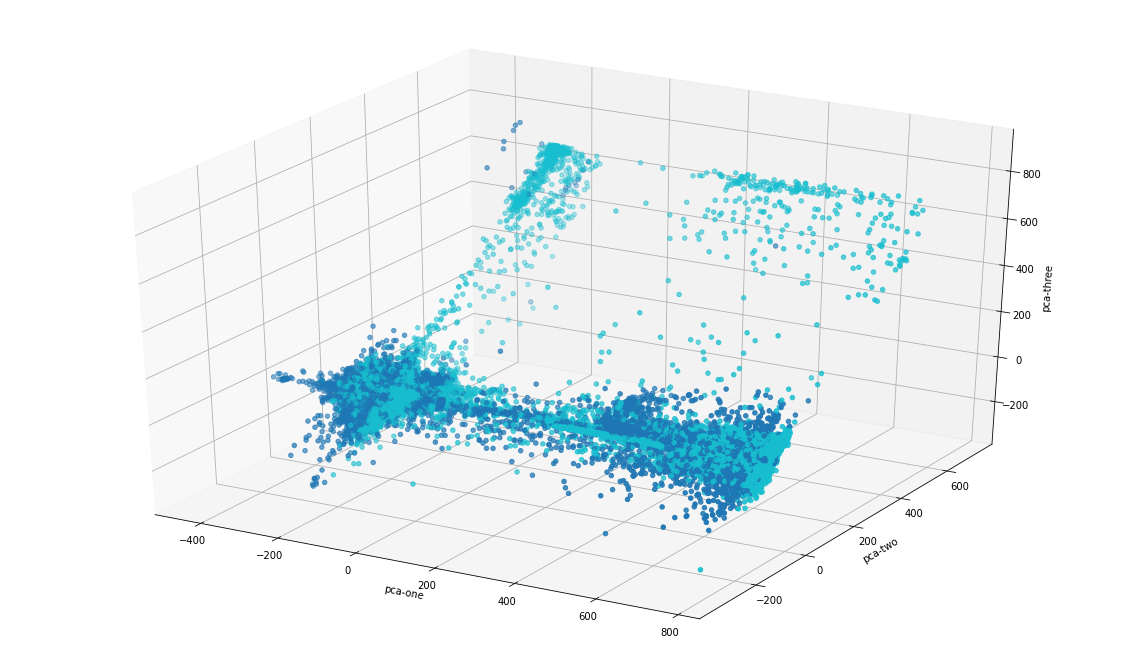

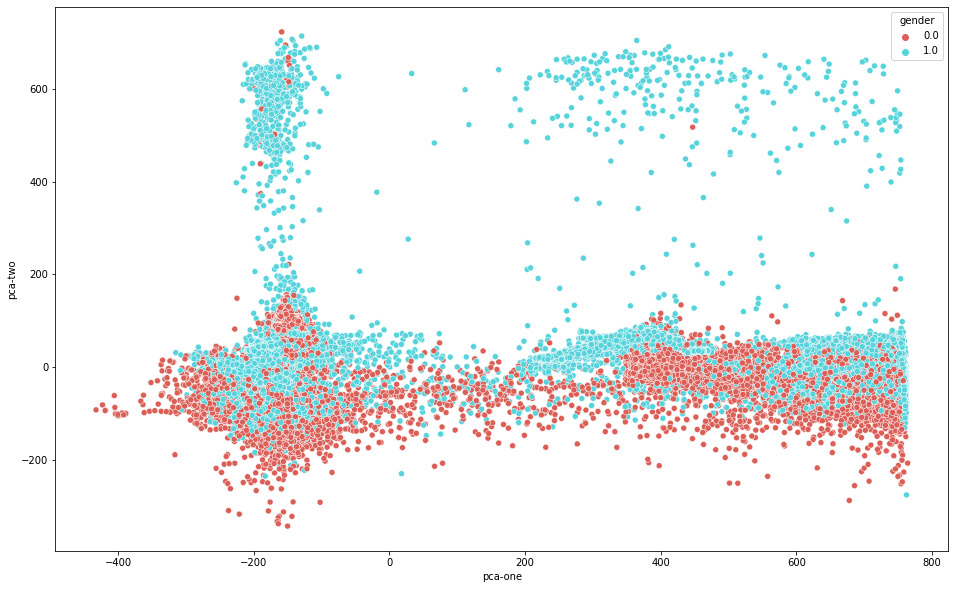

In [9]:
# y=pd.DataFrame(y)
X=data.iloc[:,:-1]
print(X.shape,y_gen.shape)
# y_gen=data['gender']
print(y_gen.unique())
y_gen=y_gen.replace(to_replace='Woman', value=1)
y_gen=y_gen.replace(to_replace='Man', value=0)
y_gen=y_gen.astype(float)
print(y_gen.unique())
from sklearn.decomposition import PCA
pca=PCA()
perm=np.random.permutation(X.shape[0])
pca_res=pca.fit_transform(X)
df=pd.DataFrame()
df['pca-one'] = pca_res[:,0]
df['pca-two'] = pca_res[:,1] 
df['pca-three'] = pca_res[:,2]
ax = plt.figure(figsize=(20,12)).gca(projection='3d')
ax.scatter(
    xs=df.loc[perm,:]["pca-one"], 
    ys=df.loc[perm,:]["pca-two"], 
    zs=df.loc[perm,:]["pca-three"], 
    c=y_gen.loc[perm], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=y_gen.loc[perm],
    palette=sns.color_palette("hls", 2),
    data=df.loc[perm,:]
)
plt.show()

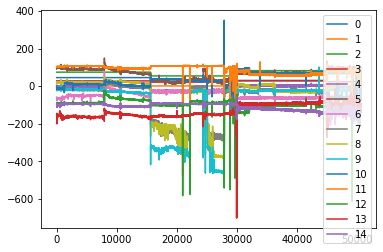

In [ ]:
X_1=data[data['class']==1]
X_1=X_1.iloc[:,2:17]
for i in range(15):
  plt.plot(X_1.iloc[:,i],label=i)
plt.legend()

**FEATURE EXTRACTION**

In [51]:
for i in range(1,5):
  x='x'+str(i)
  y='y'+str(i)
  z='z'+str(i)
  norm='norm'+str(i)
  roll='roll'+str(i)
  pitch='pitch'+str(i)
  data[pitch]=np.arctan(data[y]/np.sqrt(data[x]**2+data[z]**2))
  data[norm]=np.sqrt(data[x]**2+data[y]**2+data[z]**2)
  data[roll]=np.arctan(-1*data[x]/data[z])

data=data.sample(frac=1)

In [52]:
data.columns
cl=['age', 'how_tall_in_meters', 'weight', 'body_mass_index', 'x1', 'y1',
       'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4',
       'pitch1', 'norm1', 'roll1', 'pitch2', 'norm2', 'roll2', 'pitch3',
       'norm3', 'roll3', 'pitch4', 'norm4', 'roll4','class']
data=data.reindex(columns=cl)
data.shape

(165633, 29)

**Resampling and Feature Selection**

In [ ]:
# #OverSampling
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state = None)
X, y = adasyn.fit_resample(data.iloc[:,:-1], data.iloc[:,-1])
X=pd.DataFrame(X)
# X.columns=['age', 'how_tall_in_meters', 'weight', 'body_mass_index', 'x1', 'y1',
#        'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4']
# y=pd.DataFrame(y)
# from sklearn.decomposition import PCA
# pca=PCA()
# perm=np.random.permutation(X.shape[0])
# pca_res=pca.fit_transform(X)
# df=pd.DataFrame()
# df['pca-one'] = pca_res[:,0]
# df['pca-two'] = pca_res[:,1] 
# df['pca-three'] = pca_res[:,2]
# ax = plt.figure(figsize=(20,12)).gca(projection='3d')
# ax.scatter(
#     xs=df.loc[perm,:]["pca-one"], 
#     ys=df.loc[perm,:]["pca-two"], 
#     zs=df.loc[perm,:]["pca-three"], 
#     c=y.loc[perm,:], 
#     cmap='tab10'
# )
# ax.set_xlabel('pca-one')
# ax.set_ylabel('pca-two')
# ax.set_zlabel('pca-three')
# plt.show()

In [ ]:
#UnderSampling using class-weights

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=y.loc[perm],
    palette=sns.color_palette("hls", 5),
    data=df.loc[perm,:]
)
plt.show()

In [ ]:
!pip install pymrmr
import pymrmr
X=data.iloc[:,:-1]
selected_features=pymrmr.mRMR(X,'MIQ',28)
selected_features

In [70]:
X=X[selected_features]

In [65]:
y=data.iloc[:,-1]
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features',embeded_rf_feature)

10 selected features ['z1', 'y2', 'z2', 'y3', 'z4', 'norm1', 'norm2', 'roll2', 'norm3', 'roll4']


In [69]:
from sklearn.ensemble import ExtraTreesClassifier

for i in range(3):
    model = ExtraTreesClassifier(n_estimators=100)
    model.fit(X, y)
    # print(model.feature_importances_)
    idx=np.argsort(-1*model.feature_importances_)
    print(idx)
    print(X.columns[idx])

[ 9 20  8 21 17 27 13  5 19  7 23  6 22 25 11 16 18 26 15  1  3 12  4  2
 24 14 10  0]
Index(['z2', 'norm2', 'y2', 'roll2', 'norm1', 'roll4', 'x4', 'y1', 'pitch2',
       'x2', 'norm3', 'z1', 'pitch3', 'pitch4', 'y3', 'pitch1', 'roll1',
       'norm4', 'z4', 'how_tall_in_meters', 'body_mass_index', 'z3', 'x1',
       'weight', 'roll3', 'y4', 'x3', 'age'],
      dtype='object')
[ 9 20  8 27 17 19 21  6  5 25 13  7 16 23 22 11 18 15 14 26  2  1 12 24
  4  3 10  0]
Index(['z2', 'norm2', 'y2', 'roll4', 'norm1', 'pitch2', 'roll2', 'z1', 'y1',
       'pitch4', 'x4', 'x2', 'pitch1', 'norm3', 'pitch3', 'y3', 'roll1', 'z4',
       'y4', 'norm4', 'weight', 'how_tall_in_meters', 'z3', 'roll3', 'x1',
       'body_mass_index', 'x3', 'age'],
      dtype='object')
[20  8  9 21  6 19 27 17  7 23 25  5 11 13 22 16 15 18  1 26 14 24 12  4
  2  3  0 10]
Index(['norm2', 'y2', 'z2', 'roll2', 'z1', 'pitch2', 'roll4', 'norm1', 'x2',
       'norm3', 'pitch4', 'y1', 'y3', 'x4', 'pitch3', 'pitch1', 'z4', 'roll1

**CLASSWISE COMPARISON OF THE RAW AND THE OVERSAMPLED DATA**

In [ ]:
X_org=data.iloc[:,:-1]
y_org=data.iloc[:,-1]
org1=X_org[y_org==1]
print(org1)
org2=X_org[y_org==2]
org3=X_org[y_org==3]
org4=X_org[y_org==4]
org5=X_org[y_org==5]
samp1=X[y==1]
print(samp1)
samp2=X[y==2]
samp3=X[y==3]
samp4=X[y==4]
samp5=X[y==5]

       age  how_tall_in_meters  weight  ...    pitch4       norm4     roll4
50366   75                1.67    67.0  ... -0.604068  223.593381 -0.627198
996     46                1.62    75.0  ... -0.368785  249.665777 -0.830959
13529   46                1.62    75.0  ... -0.440422  255.675576 -0.763995
47252   75                1.67    67.0  ... -0.699136  222.202610 -0.614098
32560   31                1.71    83.0  ... -0.521278  242.977365 -0.489120
...    ...                 ...     ...  ...       ...         ...       ...
9450    46                1.62    75.0  ... -0.459923  232.045254 -0.764993
28843   28                1.58    55.0  ... -0.396608  243.339269 -0.690745
1130    46                1.62    75.0  ... -0.386001  244.364482 -0.816638
11570   46                1.62    75.0  ... -0.452436  247.050602 -0.747200
42253   31                1.71    83.0  ... -0.604044  235.925836 -0.493593

[50631 rows x 28 columns]
         age  how_tall_in_meters  weight  ...    pitch4      

In [ ]:
description_over= X.describe()
description_org = X_org.describe()
diff_org=description_over-description_org
diff_org


,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,pitch1,norm1,roll1,pitch2,norm2,roll2,pitch3,norm3,roll3,pitch4,norm4,roll4
count,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000,87412.000000
mean,-0.366325,0.006436,0.457496,-0.051918,-0.828461,1.007599,-10.554876,-25.346759,-30.600480,-29.502941,-7.854755,-5.802838,-2.935336,-6.828376,-0.218057,5.246011,-0.042681,9.132939,0.006160,-0.088733,43.146414,-0.016762,-0.003736,3.375714,-0.060812,0.001619,1.284711,-0.037879
std,0.680830,0.001833,0.231468,-0.034411,2.947256,-0.195400,3.600374,7.320041,8.787937,8.602944,7.516452,19.342413,12.808423,0.271999,-1.703361,3.117364,0.000290,2.679731,-0.033976,0.024422,10.994513,-0.011961,0.050943,19.918680,-0.011717,-0.009701,3.093708,-0.000883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-1.086026,4.000000,-9.000000,-231.956729,-255.793393,-243.000000,-8.000000,1.915420,0.706928,-5.000000,0.115002,2.000000,-0.048527,25.472460,-0.000197,0.002173,23.177019,0.014809,0.033355,-1.401741,-0.093827,0.004406,-0.093590,-0.034505
50%,0.000000,0.000000,0.000000,0.000000,-1.000000,-0.845127,-8.177308,-4.000000,-6.000000,-3.000000,-6.000000,1.000000,2.000000,-8.000000,-0.054252,3.000000,-0.051761,4.233920,-0.005545,-0.155446,4.476696,-0.107637,0.010828,-2.585961,-0.060763,0.001518,1.917056,-0.038819
75%,0.000000,0.000000,0.000000,-0.200000,-1.000000,-1.000000,-23.912026,0.000000,-1.617813,-10.462523,-5.000000,-1.388879,1.168181,-4.000000,-1.785178,6.734027,-0.025258,6.431841,-0.010453,-0.002960,378.241938,-0.003706,0.008893,-3.554973,-0.036074,-0.005829,2.245931,-0.021196
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
diff1=org1.describe()-samp1.describe()
diff2=org2.describe()-samp2.describe()
diff3=org3.describe()-samp3.describe()
diff4=org4.describe()-samp4.describe()
diff5=org5.describe()-samp5.describe()
org4.describe()

,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,pitch1,norm1,roll1,pitch2,norm2,roll2,pitch3,norm3,roll3,pitch4,norm4,roll4
count,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000,11827.000000
mean,37.370339,1.636226,70.039486,25.997176,-1.889152,96.517714,-115.424791,-93.650884,-65.665088,-167.434514,8.457343,106.203095,-90.105775,-183.074406,-96.062991,-140.828190,0.728480,155.732381,0.037961,0.248487,245.779397,-0.071852,0.862213,142.234302,0.096546,-0.397486,251.917192,-0.908001
std,12.536252,0.053217,11.590162,3.069699,13.478628,13.854438,53.406328,166.500360,193.750446,198.462284,13.813424,21.461260,23.204101,33.149782,13.950530,15.291355,0.232619,40.190353,0.259549,0.679782,292.158260,0.504943,0.185491,20.708462,0.155767,0.082601,25.336140,0.094186
min,28.000000,1.580000,55.000000,22.000000,-306.000000,-271.000000,-603.000000,-494.000000,-517.000000,-616.000000,-211.000000,-341.000000,-403.000000,-442.000000,-198.000000,-197.000000,-0.597418,89.230040,-1.570796,-1.390943,2.828427,-1.570796,-1.157655,63.182276,-1.114724,-0.859400,137.302586,-1.274365
25%,28.000000,1.580000,55.000000,22.000000,-10.000000,88.000000,-143.000000,-269.000000,-284.000000,-385.000000,-1.000000,104.000000,-113.000000,-201.000000,-101.000000,-152.000000,0.568971,134.391219,-0.080904,-0.542372,44.469090,-0.611241,0.749235,126.795110,-0.011764,-0.422196,235.580135,-0.964998
50%,31.000000,1.620000,75.000000,28.400000,-5.000000,97.000000,-116.000000,-3.000000,26.000000,-73.000000,11.000000,108.000000,-84.000000,-183.000000,-94.000000,-145.000000,0.687331,150.446004,-0.038443,0.669581,110.168053,-0.053141,0.920572,143.027969,0.120109,-0.381907,249.977999,-0.907859
75%,46.000000,1.710000,83.000000,28.600000,3.000000,104.000000,-93.000000,10.000000,78.000000,-26.000000,19.000000,115.000000,-71.000000,-156.000000,-88.000000,-133.000000,0.811160,171.752729,0.026310,0.814515,549.863619,0.244979,0.976954,158.987421,0.206329,-0.351598,265.495763,-0.848757
max,75.000000,1.710000,83.000000,28.600000,509.000000,533.000000,411.000000,66.000000,102.000000,17.000000,93.000000,471.000000,-26.000000,-70.000000,-39.000000,-56.000000,1.435857,843.854845,1.539556,1.453688,943.288927,1.541393,1.413440,568.146108,0.647392,-0.140305,467.132743,-0.433494


In [ ]:
print(X_org[np.logical_and(X_org['z2']>-167.434514,y_org==4)].shape)
# print()

(8631, 28)


**RAW FEATURE ANALYSIS**

In [ ]:
X=data.iloc[:,:17]
y=pd.DataFrame(data.iloc[:,17])


user (text) 

---
gender (text) 

---


age (integer)

---


how_tall_in_meters (real)

---


weight (int)

---


body_mass_index (real)

---


x1 (type int, contains the read value of the axis 'x' of the 1st accelerometer, mounted on waist)

---


y1 (type int, contains the read value of the axis 'y' of the 1st accelerometer, mounted on waist)

---


z1 (type int, contains the read value of the axis 'z' of the 1st accelerometer, mounted on waist)

---


x2 (type int, contains the read value of the axis 'x' of the 2nd accelerometer, mounted on the left thigh)

---


y2 (type int, contains the read value of the axis 'y' of the 2nd accelerometer, mounted on the left thigh)

---


z2 (type int, contains the read value of the axis 'z' of the 2nd accelerometer, mounted on the left thigh)

---


x3 (type int, contains the read value of the axis 'x' of the 3rd accelerometer, mounted on the right ankle)

---


y3 (type int, contains the read value of the axis 'y' of the 3rd accelerometer, mounted on the right ankle)

---


z3 (type int, contains the read value of the axis 'z' of the 3rd accelerometer, mounted on the right ankle)

---


x4 (type int, contains the read value of the axis 'x' of the 4th accelerometer, mounted on the right upper-arm)

---


y4 (type int, contains the read value of the axis 'y' of the 4th accelerometer, mounted on the right upper-arm)

---


z4 (type int, contains the read value of the axis 'z' of the 4th accelerometer, mounted on the right upper-arm)

---


[sitting: 1, standing: 2, walking: 3, sitting down: 4, standing up: 5]


Accelerometer mounted on waist

In [ ]:
# data=data[149423:163460]
# print(data.head(5))
# y=y[149423:163460]
fig,axis=plt.subplots(3,1,figsize=(5,12),sharex=True)
axis[0].scatter(y,data['x1'].to_numpy().reshape(-1,1))
# axis[0].xlabel('Class')
axis[0].set_ylabel('x1')
axis[1].scatter(y,data['y1'].to_numpy().reshape(-1,1))
# axis[1].xlabel('Class')
axis[1].set_ylabel('y1')
axis[2].scatter(y,data['z1'].to_numpy().reshape(-1,1))
plt.xlabel('Class')
axis[2].set_ylabel('z1')


Baithne pe kamariya sabse zada hilti hai isliye activity zada hai. 
weight loss ke liye situps are highly effective
max activity is along the z-axis
man of age 31: smooth in all the axes(in walking)
man of age 75: smooth in x&y and fluctuating along the z (in walking)

waist: sitting down

Accelerometer mounted on right ankle

In [ ]:
fig,axis=plt.subplots(3,1,figsize=(5,12),sharex=True)
axis[0].scatter(y,data['x3'].to_numpy().reshape(-1,1))
# axis[0].xlabel('Class')
axis[0].set_ylabel('x3')
axis[1].scatter(y,data['y3'].to_numpy().reshape(-1,1))
# axis[1].xlabel('Class')
axis[1].set_ylabel('y3')
axis[2].scatter(y,data['z3'].to_numpy().reshape(-1,1))
plt.xlabel('Class')
axis[2].set_ylabel('z3')

right ankle: for all classes

Accelerometer mounted on right upper arm

In [ ]:
fig,axis=plt.subplots(3,1,figsize=(5,12),sharex=True)
axis[0].scatter(y,data['x4'].to_numpy().reshape(-1,1))
# axis[0].xlabel('Class')
axis[0].set_ylabel('x4')
axis[1].scatter(y,data['y4'].to_numpy().reshape(-1,1))
# axis[1].xlabel('Class')
axis[1].set_ylabel('y4')
axis[2].scatter(y,data['z4'].to_numpy().reshape(-1,1))
plt.xlabel('Class')
axis[2].set_ylabel('z4')

Accelerometer mounted on left thigh

In [ ]:
fig,axis=plt.subplots(3,1,figsize=(5,12),sharex=True)
axis[0].scatter(y,data['x2'].to_numpy().reshape(-1,1))
# axis[0].xlabel('Class')
axis[0].set_ylabel('x2')
axis[1].scatter(y,data['y2'].to_numpy().reshape(-1,1))
# axis[1].xlabel('Class')
axis[1].set_ylabel('y2')
axis[2].scatter(y,data['z2'].to_numpy().reshape(-1,1))
plt.xlabel('Class')
axis[2].set_ylabel('z2')

In [ ]:

# from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier

# embeded_lr_selector = SelectFromModel(LogisticRegression(penalty='l2'), max_features=16)
# embeded_lr_selector.fit(X, y)

# embeded_lr_support = embeded_lr_selector.get_support()
# embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()

# print(str(len(embeded_lr_feature)), 'selected features')

# from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import RandomForestClassifier

# embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=16)
# embeded_rf_selector.fit(X, y)

# embeded_rf_support = embeded_rf_selector.get_support()
# embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
# print(str(len(embeded_rf_feature)), 'selected features')

In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy_score(embeded_lr_selector,y_test)
# print(embeded_rf_feature)

In [ ]:
# print(embeded_lr_feature)

In [ ]:
# print(embeded_rf_selector.estimator)

In [ ]:
# X_selected=data[embeded_rf_feature]

In [ ]:
# X_selected.head()

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# clf=LogisticRegression()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)
def ret_indices(fold_size,indices,k):
  val_indices = indices[((k-1)*fold_size):(k*fold_size)]
  train_indices = np.setdiff1d(indices, val_indices)
  val_indices = np.array(val_indices)
  return (val_indices, train_indices)
def k_fold_val(X,y,k,model):
  indices=[i for i in range(len(y))]
  np.random.shuffle(indices)
  fold_size=int(len(X)/k)
  accuracy=0.0
  for i in range(k):
    val_indices,train_indices=ret_indices(fold_size,indices,k)
    X_train=X.iloc[train_indices]
    y_train=y.iloc[train_indices]
    X_val=X.iloc[val_indices]
    y_val=y.iloc[val_indices]
    model.fit(X_train,y_train)
    y_pred=model.predict(X_val)
    accuracy+=accuracy_score(y_pred,y_val)
  return accuracy/k
# k_fold_val(X_train,y_train,5,clf)?

In [ ]:
import sklearn.metrics as metric
def evaluation(y_pred, y_test):
  acc=metric.accuracy_score(y_test,y_pred)
  con_mat=metric.confusion_matrix(y_test,y_pred)
  precision=metric.precision_score(y_test,y_pred,average='weighted')
  f1_score=metric.f1_score(y_test,y_pred,average='weighted')
  return acc,precision,f1_score,con_mat

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


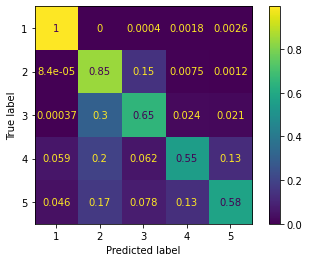

In [ ]:
clf=LogisticRegression()
clf.fit(X_train,y_train)
plot_confusion_matrix(clf,X_test,y_test,normalize='true')

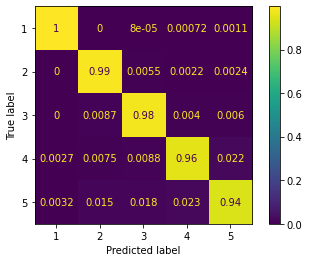

In [ ]:
from sklearn.metrics import plot_confusion_matrix
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
plot_confusion_matrix(clf,X_test,y_test,normalize='true')

In [ ]:
confusion_matrix

array([[12574,     0,     1,     2,     8],
       [    0, 11744,    80,    16,    29],
       [    1,    79, 10704,    44,    66],
       [    7,    18,    44,  2787,    80],
       [   13,    33,    53,    97,  2929]])

**EXTRACTED FEATURES ANALYSIS**

In [ ]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,:-1]
y=data.iloc[:,-1].to_numpy()
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)

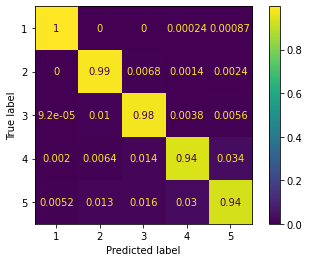

In [ ]:
from sklearn.metrics import plot_confusion_matrix
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
plot_confusion_matrix(clf,X_test,y_test,normalize='true')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


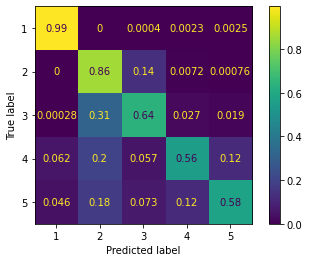

In [ ]:
clf=LogisticRegression()
clf.fit(X_train,y_train)
plot_confusion_matrix(clf,X_test,y_test,normalize='true')

**FINAL ANALYSIS**

In [84]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# X=X[selected_features]
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)


In [73]:
clf=LogisticRegression()
# k_fold_val(X_train,y_train,5,clf)
clf.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_pred=clf.predict(X_test)
print(classification_report(y_pred,y_test,digits=3))
# print('accuracy',accuracy_score(y_pred,y_test))
# print('recall', recall_score(y_pred,y_test,labels=[1,2,3,4,5]))
# print('precision', precision_score(y_pred,y_test,average='micro'))


              precision    recall  f1-score   support

           1      0.993     0.973     0.983     12919
           2      0.864     0.719     0.784     14235
           3      0.702     0.802     0.748      9493
           4      0.560     0.712     0.627      2324
           5      0.576     0.733     0.645      2438

    accuracy                          0.818     41409
   macro avg      0.739     0.788     0.758     41409
weighted avg      0.833     0.818     0.821     41409



In [ ]:
clf=SGDClassifier()
# k_fold_val(X_train,y_train,5,clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
classification_report(y_pred,y_test,digits=3)

str

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
# k_fold_val(X_train,y_train,5,clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           1      0.998     0.998     0.998     12658
           2      0.987     0.988     0.987     12652
           3      0.985     0.979     0.982     12673
           4      0.984     0.988     0.986     12660
           5      0.983     0.983     0.983     12619

    accuracy                          0.987     63262
   macro avg      0.987     0.987     0.987     63262
weighted avg      0.987     0.987     0.987     63262



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_pred,y_test,digits=3))

              precision    recall  f1-score   support

           1      1.000     1.000     1.000     12654
           2      0.999     1.000     0.999     12642
           3      1.000     0.998     0.999     12689
           4      0.999     1.000     0.999     12656
           5      0.999     0.999     0.999     12621

    accuracy                          0.999     63262
   macro avg      0.999     0.999     0.999     63262
weighted avg      0.999     0.999     0.999     63262



In [32]:
# from sklearn.decomposition import PCA
# pca=PCA()
# perm=np.random.permutation(X.shape[0])
# pca_res=pca.fit_transform(X)
# df=pd.DataFrame()
# df['pca-one'] = pca_res[:,0]
# df['pca-two'] = pca_res[:,1] 
# df['pca-three'] = pca_res[:,2]
# X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.99,stratify=y)
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.30,stratify=y_train)
clf=SVC(kernel='poly')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_pred,y_test,digits=3))

              precision    recall  f1-score   support

           1      1.000     0.817     0.899       186
           2      0.974     0.507     0.667       292
           3      0.470     0.947     0.628        75
           4      0.658     0.680     0.669       147
           5      0.296     0.763     0.427        59

    accuracy                          0.680       759
   macro avg      0.680     0.743     0.658       759
weighted avg      0.817     0.680     0.702       759



In [ ]:
clf=GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_pred,y_test,digits=3))

              precision    recall  f1-score   support

           1      0.990     0.868     0.925     14435
           2      0.901     0.543     0.678     20992
           3      0.599     0.745     0.664     10189
           4      0.619     0.599     0.609     13072
           5      0.210     0.579     0.308      4574

    accuracy                          0.664     63262
   macro avg      0.664     0.667     0.637     63262
weighted avg      0.764     0.664     0.691     63262



Using class weights

In [25]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1].to_numpy()
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.97)
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,stratify=y_train,test_size=0.3)

In [77]:
clf=LogisticRegression(class_weight='balanced')
# k_fold_val(X_train,y_train,5,clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_pred,y_test,digits=3))

              precision    recall  f1-score   support

           1      0.979     0.987     0.983     12550
           2      0.825     0.767     0.795     12751
           3      0.646     0.775     0.705      9047
           4      0.706     0.566     0.628      3693
           5      0.671     0.618     0.644      3368

    accuracy                          0.805     41409
   macro avg      0.766     0.743     0.751     41409
weighted avg      0.810     0.805     0.805     41409



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [78]:
clf=SGDClassifier(class_weight='balanced')
# k_fold_val(X_train,y_train,5,clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_pred,y_test,digits=3))

              precision    recall  f1-score   support

           1      0.994     0.971     0.982     12957
           2      0.423     0.764     0.544      6549
           3      0.930     0.546     0.688     18489
           4      0.572     0.725     0.639      2332
           5      0.292     0.837     0.433      1082

    accuracy                          0.731     41409
   macro avg      0.642     0.769     0.657     41409
weighted avg      0.833     0.731     0.748     41409



In [79]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(class_weight='balanced')
# k_fold_val(X_train,y_train,5,clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           1      0.999     0.998     0.998     12658
           2      0.984     0.989     0.986     11843
           3      0.981     0.976     0.979     10847
           4      0.947     0.952     0.949      2957
           5      0.936     0.929     0.932      3104

    accuracy                          0.981     41409
   macro avg      0.969     0.969     0.969     41409
weighted avg      0.981     0.981     0.981     41409



In [80]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(class_weight='balanced')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_pred,y_test,digits=3))

              precision    recall  f1-score   support

           1      1.000     1.000     1.000     12656
           2      0.998     0.997     0.997     11855
           3      0.998     0.996     0.997     10868
           4      0.989     0.989     0.989      2958
           5      0.981     0.992     0.986      3072

    accuracy                          0.996     41409
   macro avg      0.993     0.995     0.994     41409
weighted avg      0.997     0.996     0.997     41409



In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.97)
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,stratify=y_train,test_size=0.3)
clf=SVC(class_weight='balanced',kernel='poly')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_pred,y_test,digits=3))

              precision    recall  f1-score   support

           1      1.000     0.936     0.967       487
           2      0.993     0.688     0.813       615
           3      0.600     0.983     0.745       238
           4      0.579     0.674     0.623        92
           5      0.455     0.864     0.596        59

    accuracy                          0.822      1491
   macro avg      0.726     0.829     0.749      1491
weighted avg      0.886     0.822     0.832      1491



In [81]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_pred,y_test,digits=3))

              precision    recall  f1-score   support

           1      0.990     0.955     0.972     13120
           2      0.924     0.735     0.819     14879
           3      0.677     0.857     0.756      8565
           4      0.631     0.539     0.581      3461
           5      0.181     0.406     0.250      1384

    accuracy                          0.803     41409
   macro avg      0.680     0.698     0.676     41409
weighted avg      0.844     0.803     0.816     41409



Raw Data

In [85]:
clf=LogisticRegression()
# k_fold_val(X_train,y_train,5,clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('logistic')
print(classification_report(y_pred,y_test,digits=3))
clf=SGDClassifier()
# k_fold_val(X_train,y_train,5,clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('SGD')
print(classification_report(y_pred,y_test,digits=3))
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
# k_fold_val(X_train,y_train,5,clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Decision Tree')
print(classification_report(y_test,y_pred,digits=3))
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('RandomForest')
print(classification_report(y_pred,y_test,digits=3))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


logistic
              precision    recall  f1-score   support

           1      0.993     0.978     0.985     12845
           2      0.861     0.726     0.788     14041
           3      0.714     0.803     0.756      9648
           4      0.586     0.704     0.640      2459
           5      0.591     0.759     0.664      2416

    accuracy                          0.823     41409
   macro avg      0.749     0.794     0.767     41409
weighted avg      0.835     0.823     0.826     41409

SGD
              precision    recall  f1-score   support

           1      0.970     0.987     0.978     12431
           2      0.251     0.920     0.394      3232
           3      0.763     0.736     0.749     11248
           4      0.969     0.213     0.350     13415
           5      0.267     0.765     0.396      1083

    accuracy                          0.657     41409
   macro avg      0.644     0.724     0.574     41409
weighted avg      0.839     0.657     0.652     41409

Decision 

In [86]:
# from sklearn.decomposition import PCA
# pca=PCA()
# perm=np.random.permutation(X.shape[0])
# pca_res=pca.fit_transform(X)
# df=pd.DataFrame()
# df['pca-one'] = pca_res[:,0]
# df['pca-two'] = pca_res[:,1] 
# df['pca-three'] = pca_res[:,2]
# X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)
X=data.iloc[:,:-1]
y=data.iloc[:,-1].to_numpy()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.97,stratify=y)
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.30,stratify=y_train)
# clf=SVC(kernel='poly')
clf=GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_pred,y_test,digits=3))

              precision    recall  f1-score   support

           1      0.982     0.947     0.964       473
           2      0.930     0.743     0.826       533
           3      0.685     0.884     0.772       302
           4      0.579     0.463     0.515       134
           5      0.205     0.469     0.286        49

    accuracy                          0.802      1491
   macro avg      0.676     0.701     0.672      1491
weighted avg      0.841     0.802     0.813      1491



**UnderSampling**

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, TomekLinks,NeighbourhoodCleaningRule
sampler=NeighbourhoodCleaningRule()
# sampler=RandomUnderSampler(random_state=42)
X_rs, y_rs = sampler.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_rs,y_rs,stratify=y_rs)


In [ ]:
clf=LogisticRegression()
# k_fold_val(X_train,y_train,5,clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('logistic')
print(classification_report(y_pred,y_test,digits=3))
clf=SGDClassifier()
# k_fold_val(X_train,y_train,5,clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('SGD')
print(classification_report(y_pred,y_test,digits=3))
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
# k_fold_val(X_train,y_train,5,clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Decision Tree')
print(classification_report(y_test,y_pred,digits=3))
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('RandomForest')
print(classification_report(y_pred,y_test,digits=3))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


logistic
              precision    recall  f1-score   support

           1      0.993     0.975     0.984     12884
           2      0.849     0.732     0.786     13703
           3      0.726     0.791     0.757      9871
           4      0.565     0.708     0.628      2361
           5      0.599     0.753     0.667      2414

    accuracy                          0.822     41233
   macro avg      0.746     0.792     0.765     41233
weighted avg      0.833     0.822     0.825     41233

SGD
              precision    recall  f1-score   support

           1      0.962     0.994     0.977     12250
           2      0.877     0.847     0.861     12242
           3      0.822     0.860     0.841     10280
           4      0.661     0.632     0.646      3091
           5      0.657     0.591     0.622      3370

    accuracy                          0.857     41233
   macro avg      0.796     0.785     0.790     41233
weighted avg      0.854     0.857     0.855     41233

Decision 

**Monte Carlo Undersampling**

In [57]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1].to_numpy()
print(np.unique(y))
def logistic(X_train,y_train,X_test,y_test):
  clf=LogisticRegression()
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  report=classification_report(y_pred,y_test,digits=3,output_dict=True)
  return report
def SGD(X_train,y_train,X_test,y_test):
  clf=LogisticRegression()
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  report=classification_report(y_pred,y_test,digits=3,output_dict=True)
  return report
def GNB(X_train,y_train,X_test,y_test):
  from sklearn.naive_bayes import GaussianNB
  clf=GaussianNB()
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  return (classification_report(y_pred,y_test,digits=3,output_dict=True))
def SVM(X_train,y_train,X_test,y_test):
  clf=SVC(kernel='poly')
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  return (classification_report(y_pred,y_test,digits=3,output_dict=True))




[1 2 3 4 5]


In [58]:
m=50
precision=np.zeros((5,1))
recall=np.zeros((5,1))
accuracy=0.0
weightedp=0.0
weightedr=0.0
macrop=0.0
macror=0.0

classes=[1,2,3,4,5]
n=min(y[y==1].shape[0],y[y==2].shape[0],y[y==3].shape[0],y[y==4].shape[0],y[y==5].shape[0])
for _ in range(m):
  Xf=pd.DataFrame(columns=X.columns)
  yf=np.array([])
  for i in classes:
    X_new=X[y==i]
    y_new=y[y==i]
    samp=X_new.sample(n, replace=True, random_state=42)
    Xf=Xf.append(samp)
    yf=np.append(y_new[:n],yf)
  X_train,X_test,y_train,y_test=train_test_split(Xf,yf,stratify=yf,test_size=0.97)
  X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,stratify=y_train,test_size=0.3)
  report=GNB(X_train,y_train,X_test,y_test)
  accuracy+=report['accuracy']
  macrop+=report['macro avg']['precision']
  macror+=report['macro avg']['recall']
  weightedp+=report['weighted avg']['precision']
  weightedr+=report['weighted avg']['recall']
  clas=['1.0','2.0','3.0','4.0','5.0']
  for i in clas:
    ind=int(float(i))
    precision[ind-1]=precision[ind-1]+report[i]['precision']
    recall[ind-1]=recall[ind-1]+report[i]['recall']
  

  






In [59]:

print('recall',recall/50)
print('precision',precision/50)
print('accuracy',accuracy/50)
print('macro recall',macror/50)
print('macro precision', macrop/50)
print('weighted precision',weightedp/50)
print('weighted recall',weightedr/50)

recall [[0.65543299]
 [0.61192088]
 [0.76783581]
 [0.58718908]
 [0.88528274]]
precision [[0.24883795]
 [0.69430259]
 [0.65481573]
 [0.91180744]
 [0.94215835]]
accuracy 0.69046904315197
macro recall 0.7015322979916959
macro precision 0.6903844119202964
weighted precision 0.7772294908793398
weighted recall 0.69046904315197


{'1': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 50631},
 '2': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 47370},
 '3': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 43390},
 '4': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 11827},
 '5': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 12415},
 'accuracy': 1.0,
 'macro avg': {'f1-score': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'support': 165633},
 'weighted avg': {'f1-score': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'support': 165633}}

In [ ]:
Xf.shape

(59135, 28)

In [ ]:
np.unique(yf)

array([1., 2., 3., 4., 5.])

**KMEANS**

Text(0.5, 1.0, 'K-Means clustering')

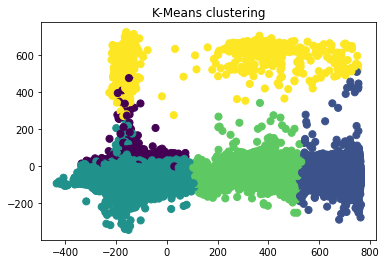

In [54]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
pca=PCA()
# tsne=TSNE()
x=pca.fit_transform(X)
# x=tsne.fit_transform(X)
labels = KMeans(5, random_state=0).fit_predict(x)
plt.scatter(x[:,0],x[:,1], c=labels,
            s=50, cmap='viridis');
plt.title('K-Means clustering')

Text(0.5, 1.0, 'K-Means clustering')

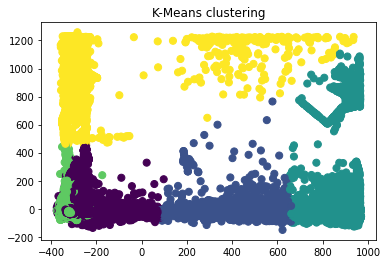

In [62]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
pca=PCA()
# tsne=TSNE()
x=pca.fit_transform(X)
# x=tsne.fit_transform(X)
labels = KMeans(5, random_state=0).fit_predict(x)
plt.scatter(x[:,0],x[:,1], c=labels,
            s=50, cmap='viridis');
plt.title('K-Means clustering')